# Extracellular Electrophysiology Data Quick Start

A short introduction to the Visual Coding Neuropixels data and SDK. For more information, see the full reference notebook.

Contents
-------------
* <a href='#peristimulus-time-histograms'>peristimulus time histograms</a>
* <a href='#image-classification'>image classification</a>

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

The `EcephysProjectCache` is the main entry point to the Visual Coding Neuropixels dataset. It allows you to download data for individual recording sessions and view cross-session summary information.

In [2]:
# this path determines where downloaded data will be stored

manifest_path = os.path.join('/local/ecephys_cache_dir/', "manifest.json")
print("manifest_path: ",manifest_path)

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

print(cache.get_all_session_types())

manifest_path:  /local/ecephys_cache_dir/manifest.json
['brain_observatory_1.1', 'functional_connectivity']


This dataset contains sessions in which two sets of stimuli were presented. The `"brain_observatory_1.1"` sessions are (almost exactly) the same as Visual Coding 2P sessions.

In [5]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
brain_observatory_type_sessions.tail()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
791319847,2019-10-03T00:00:00Z,769360779,brain_observatory_1.1,116.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,555,2229,6,"[APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,..."
797828357,2019-10-03T00:00:00Z,776061251,brain_observatory_1.1,107.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,611,2232,6,"[PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."
799864342,2019-10-03T00:00:00Z,772616823,brain_observatory_1.1,129.0,M,wt/wt,604,2233,6,"[APN, POL, LP, DG, CA1, VISrl, nan, LGd, CA3, ..."


In [7]:
# try cache.get_probes
probes = cache.get_probes()
probes.tail()

,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
848037570,847657808,1250.009761,probeB,PXI,30000.234268,True,148,383,"[APN, MB, NOT, DG, ProS, VISpm, nan]"
848037572,847657808,1250.012584,probeC,PXI,30000.302018,True,89,383,"[DG, POST, SUB, VISp, nan]"
848037574,847657808,1250.011776,probeD,PXI,30000.282632,True,155,383,"[DG, CA3, CA1, VISl, nan]"
848037576,847657808,1250.012826,probeE,PXI,30000.307834,True,89,383,"[MGd, TH, DG, CA3, CA1, VISal, nan]"
848037578,847657808,1250.011003,probeF,PXI,30000.264062,True,145,383,"[SGN, LP, TH, DG, CA1, VISrl, nan]"


In [8]:
# try cache.get_channels
channels = cache.get_channels()
channels.tail()

,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,phase,sampling_rate,has_lfp_data,unit_count
id,,,,,,,,,,,,,,,
868937722,868929142,379,27,3800,7385.0,-135.0,9601.0,NaN,NaN,839068429,1250.011162,PXI,30000.267893,True,0
868937726,868929142,380,43,3820,7385.0,-142.0,9604.0,NaN,NaN,839068429,1250.011162,PXI,30000.267893,True,0
868937731,868929142,381,11,3820,7384.0,-149.0,9608.0,NaN,NaN,839068429,1250.011162,PXI,30000.267893,True,0
868937735,868929142,382,59,3840,7384.0,-156.0,9611.0,NaN,NaN,839068429,1250.011162,PXI,30000.267893,True,0
868937739,868929142,383,27,3840,7383.0,-164.0,9615.0,NaN,NaN,839068429,1250.011162,PXI,30000.267893,True,0


In [9]:
# try cache.get_units
units = cache.get_units()
units.tail()

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,...,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype
id,,,,,,,,,,,,,,,,,,,,,
951911942,0.368040,189.24906,0.001083,122.82,5.362617,0.631826,850103120,0.984659,0.192295,0.080230,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951911948,0.660350,80.70660,0.000416,108.17,3.507884,0.302178,850103122,10.327972,0.233501,0.000365,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951911955,0.357672,117.23244,0.023316,336.04,2.790057,0.714238,850103126,1.782535,0.192295,0.318256,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951911961,0.263957,82.12503,0.032783,361.88,2.954858,0.769179,850103134,3.211115,0.247236,0.497900,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951912003,0.317090,80.63601,0.011388,249.96,3.086359,0.782915,850103100,2.196052,0.219765,0.056454,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


### peristimulus time histograms

We are going to pick a session arbitrarily and download its spike data.

In [17]:
session_id = 799864342
# directory = os.path.join('/local/ecephys_cache_dir/' + 'session_' + str(session_id))
session = cache.get_session_data(session_id)

We can get a high-level summary of this session by acessing its `metadata` attribute:

In [18]:
session.metadata

{'specimen_name': 'C57BL/6J-424448',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'wt/wt',
 'sex': 'M',
 'age_in_days': 129.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 604,
 'num_channels': 2233,
 'num_probes': 6,
 'num_stimulus_presentations': 70931,
 'session_start_time': datetime.datetime(2019, 1, 8, 13, 26, 7, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 799864342,
 'structure_acronyms': ['VISam',
  nan,
  'COAa',
  'CA1',
  'LP',
  'DG',
  'VISmma',
  'VISp',
  'ProS',
  'SUB',
  'CA3',
  'CA2',
  'VISl',
  'VISal',
  'LGd',
  'VISrl',
  'APN',
  'POL'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes',
  'drifting_gratings_contrast']}

We can also take a look at how many units were recorded in each brain structure:

In [19]:
session.structurewise_unit_counts

CA1       109
VISp       75
LGd        70
VISal      52
LP         51
VISmma     44
VISl       40
ProS       36
VISam      29
VISrl      29
DG         20
CA3        16
APN        11
CA2         9
SUB         7
POL         6
Name: ecephys_structure_acronym, dtype: int64

In [20]:
presentations = session.get_stimulus_table("flashes")
presentations.tail()

,color,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3792,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1580.302369,1.0,flashes,1580.552572,0.250203,245
3793,1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1582.304019,1.0,flashes,1582.554230,0.250211,244
3794,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1584.305699,1.0,flashes,1584.555910,0.250211,245
3795,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1586.307329,1.0,flashes,1586.557552,0.250223,245
3796,1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1588.309069,1.0,flashes,1588.559270,0.250201,244


In [21]:
session.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes',
 'drifting_gratings_contrast']

In [22]:
presentations = session.get_stimulus_table("natural_scenes")
presentations.tail()

,frame,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,
68224,12.0,8572.430482,13.0,natural_scenes,8572.680685,0.250203,5002
68225,-1.0,8572.680685,13.0,natural_scenes,8572.930888,0.250203,5005
68226,38.0,8572.930888,13.0,natural_scenes,8573.181091,0.250203,4911
68227,38.0,8573.181091,13.0,natural_scenes,8573.431296,0.250204,4911
68228,94.0,8573.431296,13.0,natural_scenes,8573.681500,0.250204,4922


In [23]:
session.units.tail()

,isi_violations,waveform_amplitude,waveform_spread,waveform_duration,nn_hit_rate,snr,peak_channel_id,cluster_id,waveform_PT_ratio,max_drift,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951108012,0.003461,133.968510,60.0,0.741709,0.980667,3.313579,849842014,343,0.331911,38.71,...,417.0,VISrl,7275.0,1254.0,8762.0,probeF,See electrode locations,30000.035925,1250.001497,True
951108008,0.021231,49.779990,110.0,0.727973,0.962963,1.634902,849842012,342,0.480022,52.54,...,417.0,VISrl,7278.0,1264.0,8757.0,probeF,See electrode locations,30000.035925,1250.001497,True
951108087,0.477828,140.361975,70.0,0.549414,0.848485,3.807190,849842030,351,0.548542,22.35,...,417.0,VISrl,7256.0,1177.0,8798.0,probeF,See electrode locations,30000.035925,1250.001497,True
951108207,0.061555,72.411885,50.0,0.590620,0.980000,2.203823,849842056,364,0.660055,47.30,...,417.0,VISrl,7224.0,1043.0,8859.0,probeF,See electrode locations,30000.035925,1250.001497,True
951108231,0.179777,47.717475,70.0,0.782915,0.986000,1.686262,849842060,367,0.936141,29.51,...,417.0,VISrl,7220.0,1024.0,8868.0,probeF,See electrode locations,30000.035925,1250.001497,True


In [36]:
session.units.index[:]

Int64Index([951087020, 951087105, 951087211, 951087291, 951087261, 951087432,
            951087330, 951087282, 951087423, 951087393,
            ...
            951107944, 951107928, 951107970, 951107988, 951107960, 951108012,
            951108008, 951108087, 951108207, 951108231],
           dtype='int64', name='unit_id', length=604)

In [35]:
len(session.units.index.values)

604

In [26]:
session.units.dtypes

isi_violations             float64
waveform_amplitude         float64
waveform_spread            float64
waveform_duration          float64
nn_hit_rate                float64
                            ...   
probe_description           object
location                    object
probe_sampling_rate        float64
probe_lfp_sampling_rate    float64
probe_has_lfp_data            bool
Length: 89, dtype: object

In [31]:
help(session.presentationwise_spike_counts)

Help on method presentationwise_spike_counts in module allensdk.brain_observatory.ecephys.ecephys_session:

presentationwise_spike_counts(bin_edges, stimulus_presentation_ids, unit_ids, binarize=False, dtype=None, large_bin_size_threshold=0.001, time_domain_callback=None) method of allensdk.brain_observatory.ecephys.ecephys_session.EcephysSession instance
    Build an array of spike counts surrounding stimulus onset per
    unit and stimulus frame.
    
    Parameters
    ---------
    bin_edges : numpy.ndarray
        Spikes will be counted into the bins defined by these edges.
        Values are in seconds, relative to stimulus onset.
    stimulus_presentation_ids : array-like
        Filter to these stimulus presentations
    unit_ids : array-like
        Filter to these units
    binarize : bool, optional
        If true, all counts greater than 0 will be treated as 1. This
        results in lower storage overhead, but is only reasonable if bin
        sizes are fine (<= 1 millise

Now that we've gotten spike data, we can create peristimulus time histograms.

In [30]:
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 951095018 ... 951097051

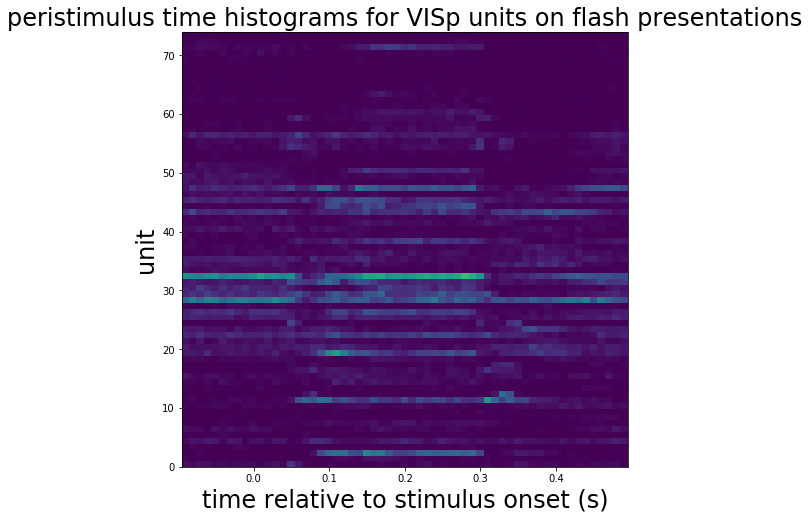

In [32]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

### image classification

First, we need to extract spikes. We will do using `EcephysSession.presentationwise_spike_times`, which returns spikes annotated by the unit that emitted them and the stimulus presentation during which they were emitted.

In [33]:
help(session.presentationwise_spike_times)

Help on method presentationwise_spike_times in module allensdk.brain_observatory.ecephys.ecephys_session:

presentationwise_spike_times(stimulus_presentation_ids=None, unit_ids=None) method of allensdk.brain_observatory.ecephys.ecephys_session.EcephysSession instance
    Produce a table associating spike times with units and
    stimulus presentations
    
    Parameters
    ----------
    stimulus_presentation_ids : array-like
        Filter to these stimulus presentations
    unit_ids : array-like
        Filter to these units
    
    Returns
    -------
    pandas.DataFrame :
    Index is
        spike_time : float
            On the session's master clock.
    Columns are
        stimulus_presentation_id : int
            The stimulus presentation on which this spike occurred.
        unit_id : int
            The unit that emitted this spike.



In [38]:
scene_presentations = session.get_stimulus_table("natural_scenes")
visp_units = session.units[session.units["ecephys_structure_acronym"] == "VISp"]

spikes = session.presentationwise_spike_times(
    stimulus_presentation_ids=scene_presentations.index.values,
    unit_ids=visp_units.index.values[:]
)

spikes

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
5913.959922,51355,951095391,0.001583
5913.960389,51355,951095552,0.002050
5913.960822,51355,951095926,0.002483
5913.961189,51355,951095714,0.002850
5913.962422,51355,951095427,0.004083
...,...,...,...
8573.665210,68228,951095617,0.233914
8573.670510,68228,951095552,0.239214
8573.671510,68228,951095450,0.240214


Next, we will convert these into a num_presentations X num_units matrix, which will serve as our input data.

In [39]:
spikes["count"] = np.zeros(spikes.shape[0])
spikes

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset,count
spike_time,,,,
5913.959922,51355,951095391,0.001583,0.0
5913.960389,51355,951095552,0.002050,0.0
5913.960822,51355,951095926,0.002483,0.0
5913.961189,51355,951095714,0.002850,0.0
5913.962422,51355,951095427,0.004083,0.0
...,...,...,...,...
8573.665210,68228,951095617,0.233914,0.0
8573.670510,68228,951095552,0.239214,0.0
8573.671510,68228,951095450,0.240214,0.0


In [41]:
spikes = spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()
spikes

time_since_stimulus_presentation_onset  \
stimulus_presentation_id unit_id                                             
51355                    951094951                                       1   
                         951094989                                       3   
                         951095004                                       1   
                         951095011                                       6   
                         951095026                                       2   
...                                                                    ...   
68228                    951095926                                       1   
                         951096064                                       1   
                         951096339                                       1   
                         951096906                                       4   
                         951096969                                       2   

                                    count  
stimulus_presentation_id unit_id           
51355                    951094951      1  
                         951094989      3  
                         951095004      1  
                         951095011      6  
                         951095026      2  
...                                   ...  
68228                    951095926      1  
                         951096064      1  
                         951096339      1  
                         951096906      4  
                         951096969      2  

[213635 rows x 2 columns]

In [42]:

spikes = spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()

design = pd.pivot_table(
    spikes, 
    values="count", 
    index="stimulus_presentation_id", 
    columns="unit_id", 
    fill_value=0.0,
    aggfunc=np.sum
)

design

unit_id,951094929,951094951,951094989,951095004,951095011,951095018,951095026,951095073,951095109,951095117,...,951096906,951096915,951096925,951096934,951096942,951096951,951096969,951097051,951097066,951097075
stimulus_presentation_id,,,,,,,,,,,,,,,,,,,,,
51355,0,1,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
51356,0,0,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,0,1,1,0
51357,0,0,1,1,1,0,1,1,1,0,...,1,1,1,0,0,0,1,0,0,1
51358,0,0,1,1,1,1,1,1,0,0,...,1,0,1,1,0,0,0,1,0,0
51359,0,0,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68224,1,0,1,1,1,0,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
68225,0,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
68226,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


... with targets being the numeric identifiers of the images presented.

In [43]:
targets = scene_presentations.loc[design.index.values, "frame"]
targets

stimulus_presentation_id
51355     72.0
51356    103.0
51357     96.0
51358     38.0
51359     72.0
         ...  
68224     12.0
68225     -1.0
68226     38.0
68227     38.0
68228     94.0
Name: frame, Length: 5950, dtype: object

In [44]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [45]:
design_arr = design.values.astype(float)
targets_arr = targets.values.astype(int)

labels = np.unique(targets_arr)

In [46]:
accuracies = []
confusions = []

for train_indices, test_indices in KFold(n_splits=5).split(design_arr):
    
    clf = svm.SVC(gamma="scale", kernel="rbf")
    clf.fit(design_arr[train_indices], targets_arr[train_indices])
    
    test_targets = targets_arr[test_indices]
    test_predictions = clf.predict(design_arr[test_indices])
    
    accuracy = 1 - (np.count_nonzero(test_predictions - test_targets) / test_predictions.size)
    print(accuracy)
    
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=labels))

0.28823529411764703
0.33109243697478996
0.3218487394957983
0.3378151260504202
0.3067226890756303


In [47]:
print(f"mean accuracy: {np.mean(accuracy)}")
print(f"chance: {1/labels.size}")

mean accuracy: 0.3067226890756303
chance: 0.008403361344537815


###### imagewise performance

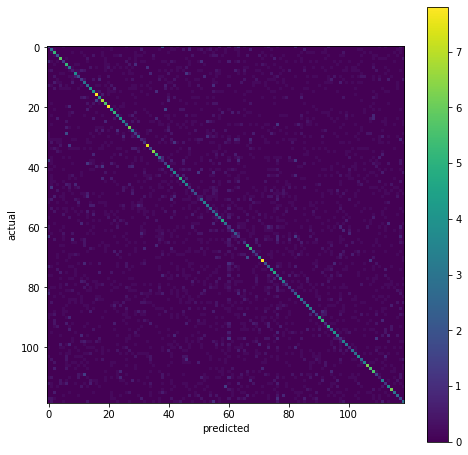

In [48]:
mean_confusion = np.mean(confusions, axis=0)

fig, ax = plt.subplots(figsize=(8, 8))

img = ax.imshow(mean_confusion)
fig.colorbar(img)

ax.set_ylabel("actual")
ax.set_xlabel("predicted")

plt.show()

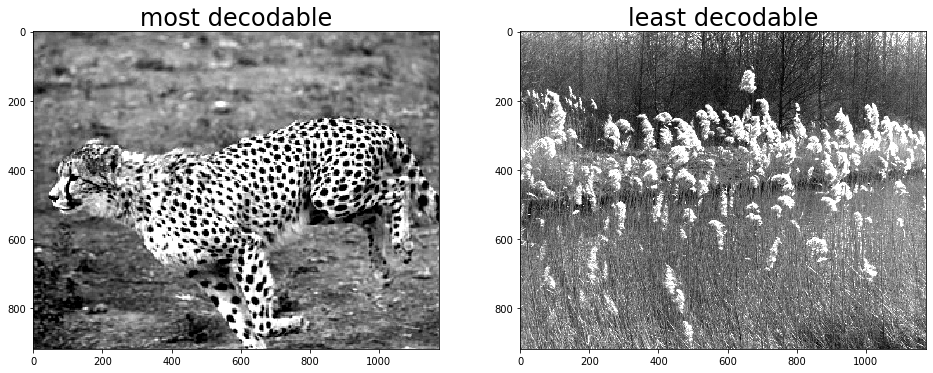

In [50]:
best = labels[np.argmax(np.diag(mean_confusion))]
worst = labels[np.argmin(np.diag(mean_confusion))]

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

best_image = cache.get_natural_scene_template(best)
ax[0].imshow(best_image, cmap=plt.cm.gray)
ax[0].set_title("most decodable", fontsize=24)

worst_image = cache.get_natural_scene_template(worst)
ax[1].imshow(worst_image, cmap=plt.cm.gray)
ax[1].set_title("least decodable", fontsize=24)


plt.show()